# Seaborn Lecture 1:

# Distribution Plots

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


sns.distplot( ) allows us to show the distribution of the univariate (one variable) set of objects.

Just pass in the column of your data frame as the input argument

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


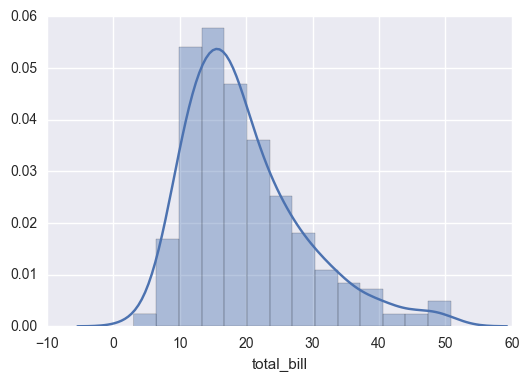

In [8]:
sns.distplot(tips['total_bill'])

So we get back a Histogram (the blocks), and a KDE (Kernal Density Estimation) which is the line. We can remove the KDE line by adding the input argument kde = False to our previous sns.distplot( ) 

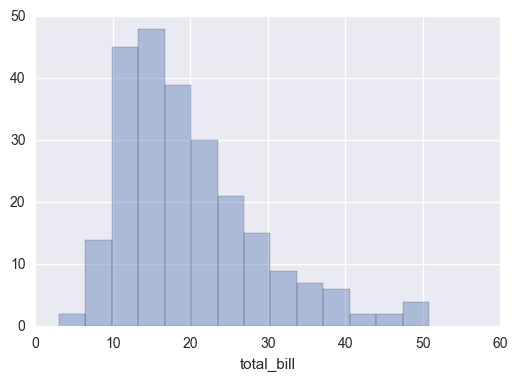

In [6]:
sns.distplot(tips['total_bill'],kde=False)

Now we just have the histogram. The histogram tells us that most of our total bills are between 10 and 20 dollars. We can find out more about this by changing the number of bins, which is the 3rd input argumnet in sns.distplot( ) by saying bins = 40. The number we can chose for the bins is really dependent on the dataset

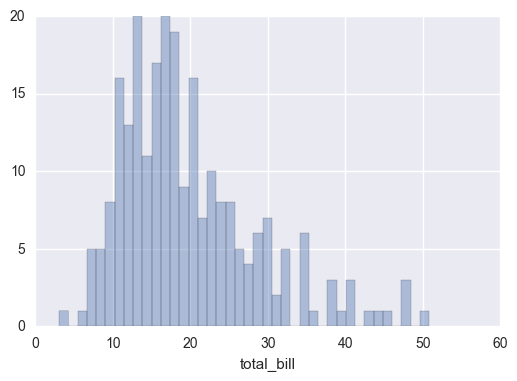

In [9]:
sns.distplot(tips['total_bill'],kde=False,bins=40)

By changing the bins we get a little bit more definition with the histogram.

## Joint Plot

Allows us to match up dist plots by variate. Pretty much lets us combine two dist plots by variate (2 variables)

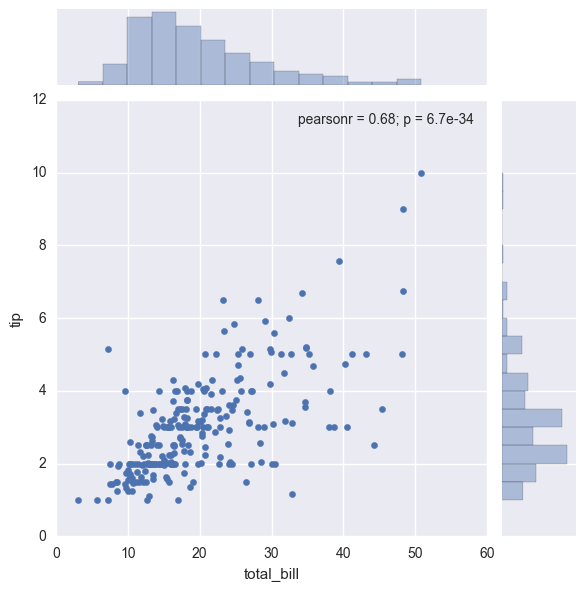

In [10]:
sns.jointplot(x='total_bill',y='tip',data=tips)

sns.jointplot( ) gives us an additional parameter kind = '' which allows us to effect what going on inside of the scatterplot. We can use the parameter kind = 'hex' to generate a hexagonal scatterplot instead (hexagon distribution platform)

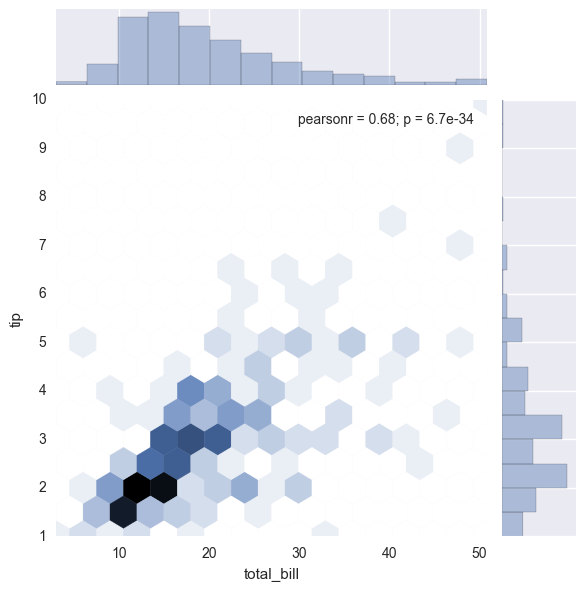

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

Another argument we can place in kind is kind = 'reg' which stands for regression

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


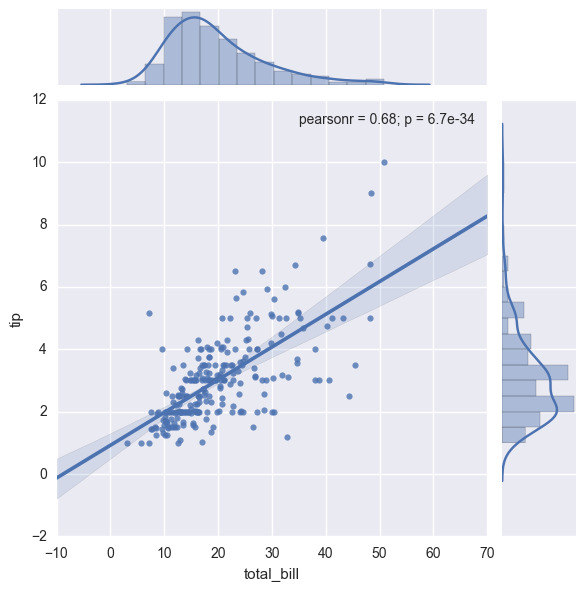

In [13]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

Shows a linear fit line through scatterplot data.

The last argument for kind we can input is kind = 'kde' which gives us our seperate kernal density estimation in 2 dimensions. Illustrates the density of where these points match up the most

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


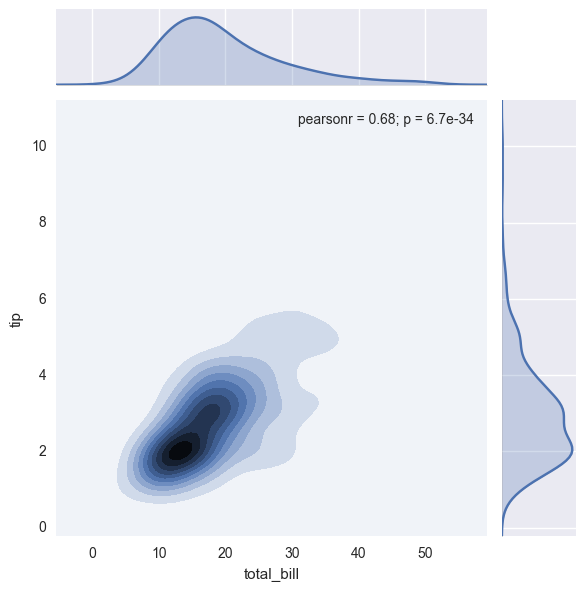

In [14]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

## Pair Plot

Plots pair-wise relationships across an entire data frame 

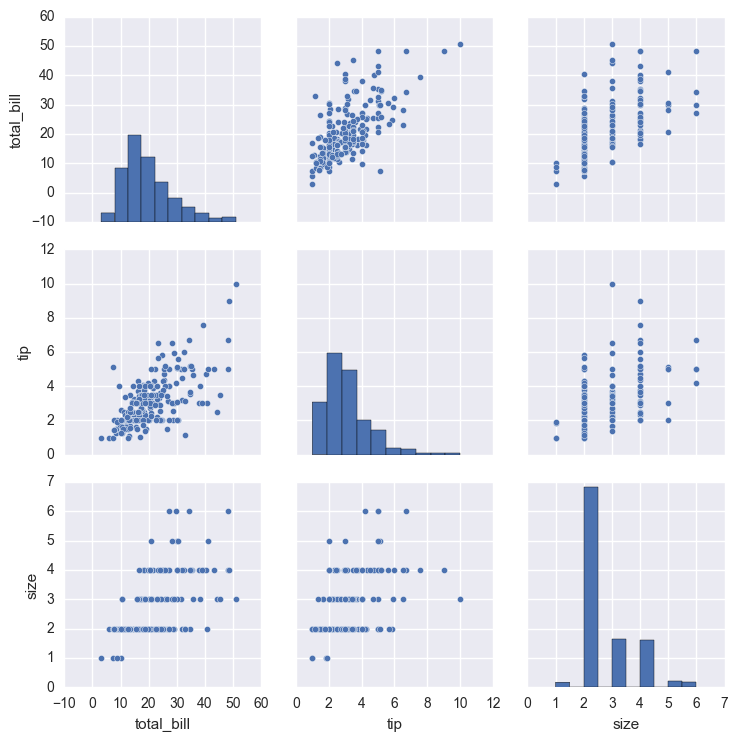

In [15]:
sns.pairplot(tips)

pairplot is dope because its a very fast way of visualizing your entire collection of data.

We can also add a hue argument to our sns.pairplot(tips) function to have sns.pairplot(tips, hue = 'Categorical Column Name')

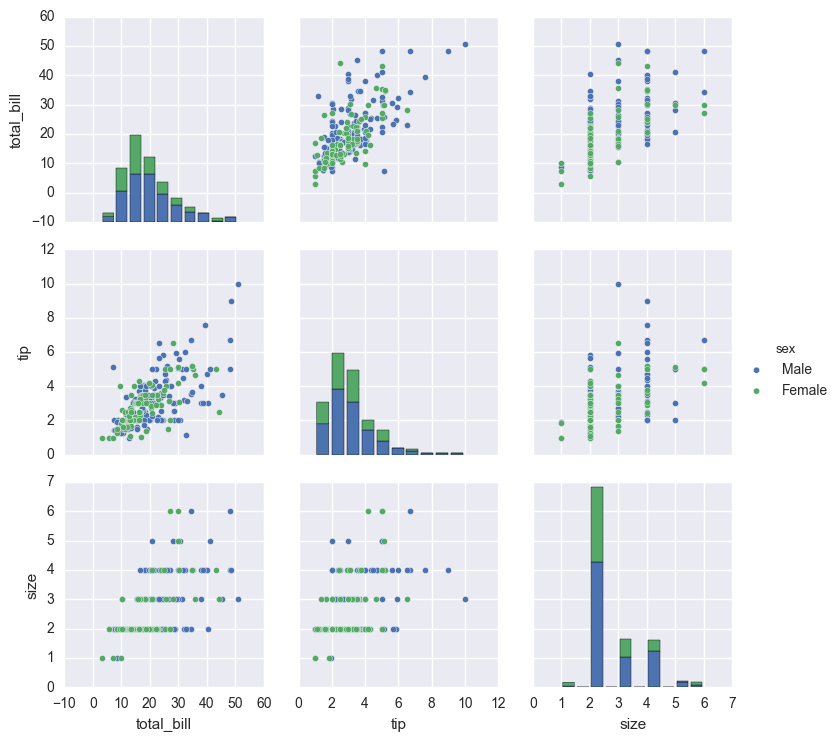

In [17]:
# in this case, categorical means not numerical but something that
# fits into a category, such as the 'sex' column since its
# either male or female
sns.pairplot(tips,hue='sex')

Colors the data points based off of the column that we passed in.

The 3rd argument we can pass in is palette, where we can specify a type of color palette.

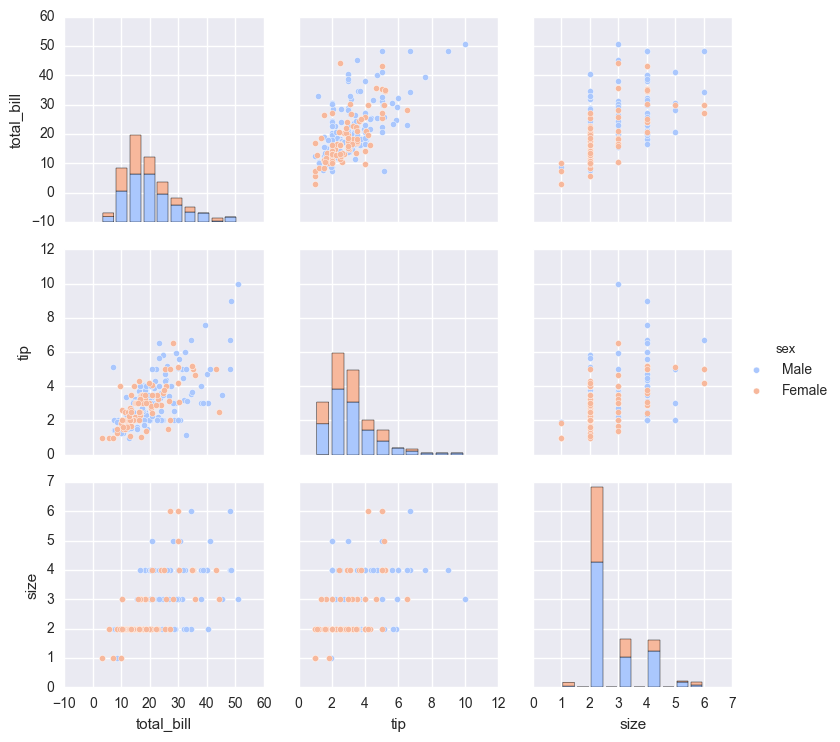

In [18]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## Rug Plots

corelated with KDE plots previously described

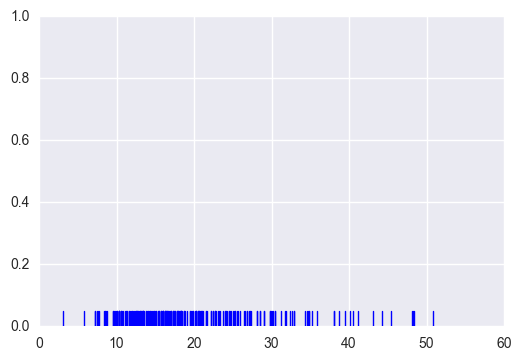

In [20]:
# Just pass in a column name as the input argument
sns.rugplot(tips['total_bill'])

rugplot draws a dash line for every single point in the distribution

## KDE Plots

(0, 1)

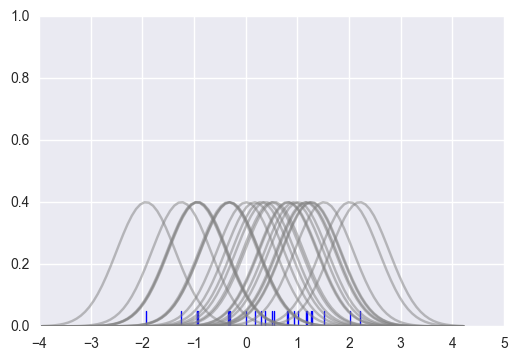

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

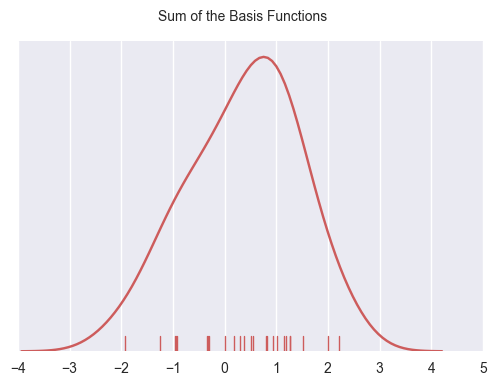

In [25]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


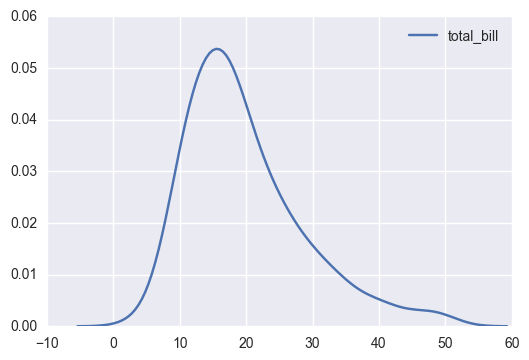

In [26]:
# Just like before with sns.distplot(), if we only wanted the KDE plot 
# with no bins we can use sns.kdeplot(tips['total_bill])
sns.kdeplot(tips['total_bill'])